In [5]:
"""
Application to classify shapes
"""
import cv2
import matplotlib.pyplot as plt

In [6]:
class GeometricShapeCounter:
    def __init__(self, file):
        self.__count = {"triangle": 0, "rectangle": 0, "pentagon": 0, "hexagon": 0, "circle": 0}
        # turn bgr image to gray
        self.original = self.__imRead(file)

    @staticmethod
    def __imRead(file):
        img = cv2.imread(file)
        return img

    @staticmethod
    def imShow(img, windowName="Trial"):
        plt.imshow(img[..., ::-1])

    def __im2Gray(self, img):
        self.__img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return self.__img_gray

    @staticmethod
    def __threshold(img, thresh, maxVal):
        # threshold for getting better results
        ret, threshImg = cv2.threshold(img, thresh, maxVal, cv2.THRESH_BINARY)
        return ret, threshImg

    def findContours(self, img, thresh, maxVal):
        _, img = self.__threshold(self.__im2Gray(img), thresh=thresh, maxVal=maxVal)
        # findContours finds the shell of shapes and classifies them hierarchically
        contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        return contours

    def findHierarchy(self, img, thresh, maxVal):
        _, img = self.__threshold(self.__im2Gray(img), thresh=thresh, maxVal=maxVal)
        # findContours finds the shell of shapes and classifies them hierarchically
        _, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        return hierarchy

    @staticmethod
    def defaults():
        defaultValues = [
            {
                3: {
                    "name": "triangle",
                    "point": 3,
                    "color": (0, 255, 255),
                    "text": "Triangle",
                    "font": cv2.FONT_HERSHEY_SIMPLEX,
                    "fontScale": 0.5,
                    "thickness": 1,
                    "fontColor": (255, 255, 255),
                },
                4: {
                    "name": "rectangle",
                    "point": 4,
                    "color": (200, 0, 1),
                    "text": "Rectangle",
                    "font": cv2.FONT_HERSHEY_SIMPLEX,
                    "fontScale": 0.5,
                    "thickness": 1,
                    "fontColor": (255, 255, 255)
                },
                5: {
                    "name": "pentagon",
                    "point": 5,
                    "color": (178, 104, 254),
                    "text": "Pentagon",
                    "font": cv2.FONT_HERSHEY_SIMPLEX,
                    "fontScale": 0.5,
                    "thickness": 1,
                    "fontColor": (255, 255, 255)
                },
                6: {
                    "name": "hexagon",
                    "point": 6,
                    "color": (0, 69, 255),
                    "text": "Hexagon",
                    "font": cv2.FONT_HERSHEY_SIMPLEX,
                    "fontScale": 0.5,
                    "thickness": 1,
                    "fontColor": (255, 255, 255)
                },
                7: {
                    "name": "circle",
                    "point": 7,
                    "color": (1, 255, 0),
                    "text": "Circle",
                    "font": cv2.FONT_HERSHEY_SIMPLEX,
                    "fontScale": 0.5,
                    "thickness": 1,
                    "fontColor": (255, 255, 255)
                }
            }
        ]
        return defaultValues

    def printCount(self):
        return self.__count

    def __countShapes(self, shape):
        self.__count[shape] += 1

    @staticmethod
    def __fillPollyWithText(img, text, approx, x, y, font, fontScale, thickness, fontColor, color, withText=True,
                            withColor=True):
        if withColor:
            cv2.fillPoly(img, [approx], color)
        if withText:
            cv2.putText(img, text, (x, y), font, fontScale, fontColor, thickness)

    @staticmethod
    def __drawCircle(img, text, x, y, font, fontScale, thickness, fontColor, cnt, color, withText=True, withColor=True):
        ((x1, y1), radius) = cv2.minEnclosingCircle(cnt)
        M = cv2.moments(cnt)
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
        if radius > 5:
            # draw the circle and centroid on the frame,
            # then update the list of tracked points
            if withColor:
                cv2.circle(img, (int(x1), int(y1)), int(radius), color, -1)
                cv2.circle(img, (int(center[0]), int(center[1])), int(radius), (255, 0, 0), -1)
        if withText:
            cv2.putText(img, text, (x, y), font, fontScale, fontColor, thickness)

    def drawContours(self, img, eps=0.031, thresh=170, maxVal=255, closed=True, withText=True, withColor=True,
                     withLog=True):
        contours = self.findContours(img, thresh=thresh, maxVal=maxVal)
        for cnt in contours:
            epsilon = eps * cv2.arcLength(cnt, closed)
            # use approxPolyDb to simplify poly lines (RDP based)
            approx = cv2.approxPolyDP(cnt, epsilon, closed)
            x = approx.ravel()[0]
            y = approx.ravel()[1]
            # classify and paint
            if 6 < len(approx):
                default = self.defaults()[0][7]
                self.__drawCircle(img, text=default["text"], x=x, y=y, font=default["font"],
                                  fontScale=default["fontScale"],
                                  thickness=default["thickness"], fontColor=default["fontColor"], cnt=cnt,
                                  color=default["color"], withText=withText, withColor=withColor)
                self.__countShapes(default["name"])
            elif len(approx) > 2:
                default = self.defaults()[0][len(approx)]
                self.__fillPollyWithText(img=img, text=default["text"], approx=approx, x=x, y=y, font=default["font"],
                                         fontScale=default["fontScale"], thickness=default["thickness"],
                                         fontColor=default["fontColor"], color=default["color"], withText=withText,
                                         withColor=withColor)
                self.__countShapes(default["name"])
        if withLog:
            print(self.printCount())
        return img

{'triangle': 5, 'rectangle': 4, 'pentagon': 5, 'hexagon': 7, 'circle': 7}


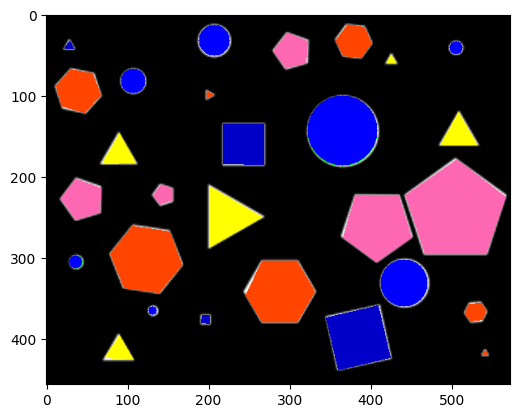

In [7]:
fileName = "../img/shapes.png"
gsc = GeometricShapeCounter(fileName)
gsc.imShow(gsc.drawContours(gsc.original, withText=False, withColor=True))